In [11]:
import requests
from datetime import timedelta
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file_name = "sample.mp4"
video_url = "https://cdn.yolobase.net/creative/cd11ce54fa298c0c37faa8f4c06f48918d07c9fa.mp4"

In [3]:
resp = requests.get(video_url)
resp.status_code

200

In [4]:
with open("sample.mp4", "wb") as fw:
    fw.write(resp.content)

In [5]:
video = cv2.VideoCapture('sample.mp4')
video

< cv2.VideoCapture 0x13856f8f0>

In [6]:
SAVING_FRAMES_PER_SECOND = 5

5

In [7]:
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05) 
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return (result + ".00").replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")


def get_saving_frames_durations(cap, saving_fps):
    """A function that returns the list of durations where to save the frames"""
    s = []
    # get the clip duration by dividing number of frames by the number of frames per second
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # use np.arange() to make floating-point steps
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s


frames per second = 30.0


In [8]:
def main(video_file):
    filename, _ = os.path.splitext(video_file)
    filename += "-opencv"
    # make a folder by the name of the video file
    if not os.path.isdir(filename):
        os.mkdir(filename)
    # read the video file    
    cap = cv2.VideoCapture(video_file)
    # get the FPS of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    # if the SAVING_FRAMES_PER_SECOND is above video FPS, then set it to FPS (as maximum)
    saving_frames_per_second = min(fps, SAVING_FRAMES_PER_SECOND)
    # get the list of duration spots to save
    saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
    # start the loop
    count = 0
    while True:
        is_read, frame = cap.read()
        if not is_read:
            # break out of the loop if there are no frames to read
            break
        # get the duration by dividing the frame count by the FPS
        frame_duration = count / fps
        try:
            # get the earliest duration to save
            closest_duration = saving_frames_durations[0]
        except IndexError:
            # the list is empty, all duration frames were saved
            break
        if frame_duration >= closest_duration:
            # if closest duration is less than or equals the frame duration, 
            # then save the frame
            frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            # drop the duration spot from the list, since this duration spot is already saved
            try:
                saving_frames_durations.pop(0)
            except IndexError:
                pass
        # increment the frame count
        count += 1

frame id = 840


In [14]:
video.set(cv2.CAP_PROP_POS_FRAMES, 60)
ret, frame = video.read()
ret, frame.shape

(True, (1280, 720, 3))

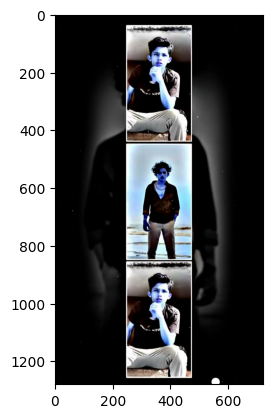

In [16]:
# cv2.imshow('frame', frame); cv2.waitKey(0)
plt.imshow(frame)
plt.show()

In [17]:
cv2.imwrite('sample.png', frame)

True

In [1]:
from uuid import uuid4
str(uuid4())

'60bb4780-cde6-463c-9a88-6a9c154cd30b'